# Tutorial 6: ID5055 Foundations of Machine Learning

**Topics Covered:** Naive Bayes Classifier

#### TASKS

1. Use a Gaussian Naive Bayes Classifier to classify Datasets 1-4 given below; Print confusion matrices for the class-imbalanced datasets 3 \& 4
2. **(optional)** Play around with dataset generation parameters (number of features, class separation etc.)
3. Create datasets with number of features - 1000, 2000, 3000, 4000 and 5000. For this question use the same dataset generation parameters as Dataset 1 in notebook. Change only the number of features per datapoint.
4. Use time module to calculate runtime of Naive Bayes for each dataset in Qn3 and plot results

## Import Libraries

Import all the necessary libraries.

In [15]:
import time
import random
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
# set random seeds
random.seed = 42
np.random.seed = 42
sns.set_style('darkgrid')

## Dataset Generation

In [17]:
### DO NOT EDIT ###
def data_gen(n_data, n_class, weights = None, f_tot = 6, f_info = 6, f_red = 0, class_sep = 1, name = 'data1_nb'):
    X,Y = make_classification(n_samples = n_data,
                             n_features = f_tot,
                             n_classes = n_class,
                             n_informative = f_info,
                             n_redundant = f_red,
                             n_clusters_per_class = 1,
                             weights = weights,
                             hypercube = True,
                             random_state = 42,
                             class_sep= class_sep)
    return X, Y

In [18]:
### DO NOT EDIT ###
# Creating the datasets
n_samples = 2000
n_classes = 2

# DATASET 1 - 1000 features
X1, Y1 = data_gen(n_data = n_samples,
                  n_class = n_classes,
                  weights = None,
                  f_tot = 1000,
                  f_info = 1000,
                  name = 'data1_nb')

# DATASET 2 - 5000 features
X2, Y2 = data_gen(n_data = n_samples,
                  n_class = n_classes,
                  weights = None,
                  f_tot = 5000,
                  f_info = 5000,
                  name = 'data2_nb')

# DATASET 3 - 20:80 class imbalanced
X3, Y3 = data_gen(n_data = n_samples,
                  n_class = n_classes,
                  weights = [0.2, 0.8],
                  f_tot = 1000,
                  f_info = 1000,
                  name = 'data3_nb')

# DATASET 4 - 10:90 class imbalanced
X4, Y4 = data_gen(n_data = n_samples,
                  n_class = n_classes,
                  weights = [0.05, 0.95],
                  f_tot = 1000,
                  f_info = 1000,
                  name = 'data4_nb')

In [19]:
### DO NOT EDIT ###
# splitting each dataset into test and train sets

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42, shuffle=True)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42, shuffle=True)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=42, shuffle=True)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.2, random_state=42, shuffle=True)

## Naive Bayes Classifier

Naive Bayes classifiers are a family of simple probabilistic classifiers which are based on Bayes Theorem. It is a fast and classification method and scales very efficiently with number of features.

**Naive Assumption**: The main assumption of such classifiers is in assuming that the effect of every feature in a class is independent of other features. This independence assumption gives these classifiers the name.

**Training**: Training a Naive Bayes classifier involves estimating the class probabilities and the conditional probabilities of features given each class. Once the classifier is trained, it can be used to make predictions. Given a set of feature values, it calculates the probability of the instance belonging to each class and assigns it to the class with the highest probability.

**Limitations**:This method is however not so reliable when the underlying independence assumption is not true or when the data shows very complex relationships which it cannot capture.

In [20]:
### DO NOT EDIT ###
def NBClassifier(X_train, Y_train, X_test, Y_test, d, conf = True):
    tick = time.time()
    model = GaussianNB()
    model.fit(X_train, Y_train)
    tock = time.time()

    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)

    print('**************************************')
    print('Dataset:', d)
    print(f"Accuracy: {acc:0,.4f}")
    sns.set_style("white")
    if conf:
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.show()

    return tock-tick

#### Dataset 1

**************************************
Dataset: 1
Accuracy: 0.8525


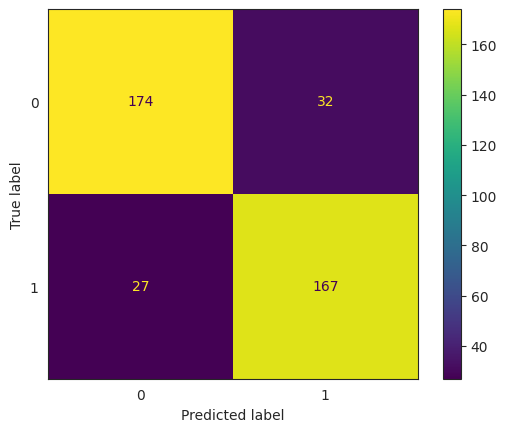

Time Taken (seconds): 0.02407526969909668


In [21]:
time1 = NBClassifier(X1_train, Y1_train, X1_test, Y1_test, 1)
print('Time Taken (seconds):', time1)

#### Dataset 2

**************************************
Dataset: 2
Accuracy: 0.6900


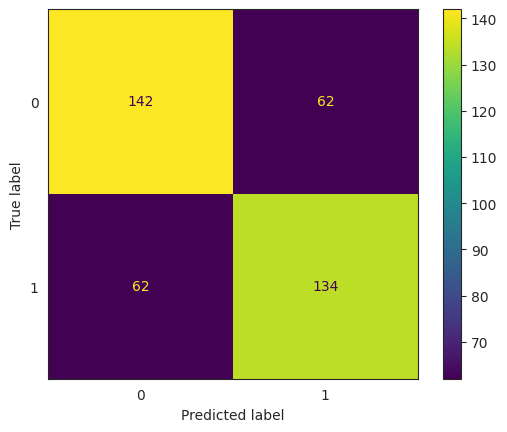

Time Taken (seconds): 0.1185297966003418


In [22]:
time2 = NBClassifier(X2_train, Y2_train, X2_test, Y2_test, 2)
print('Time Taken (seconds):', time2)

#### Dataset 3

**************************************
Dataset: 3
Accuracy: 0.8675


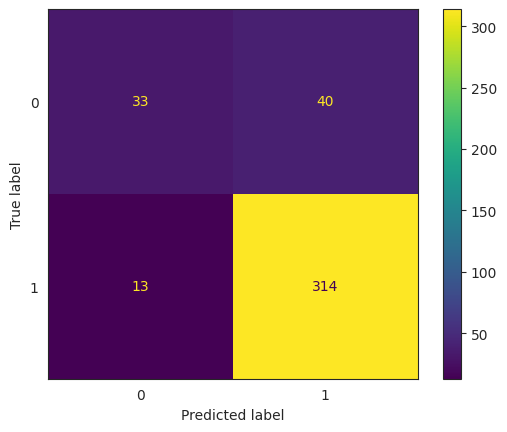

Time Taken (seconds): 0.020758867263793945


In [23]:
time3 = NBClassifier(X3_train, Y3_train, X3_test, Y3_test, 3)
print('Time Taken (seconds):', time3)

#### Dataset 4

**************************************
Dataset: 4
Accuracy: 0.9500


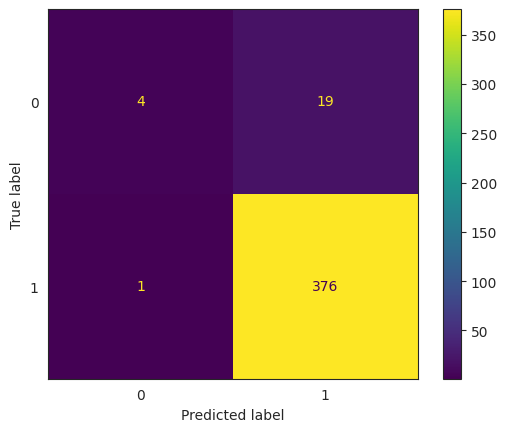

Time Taken (seconds): 0.027128219604492188


In [24]:
time4 = NBClassifier(X4_train, Y4_train, X4_test, Y4_test, 4)
print('Time Taken (seconds):', time4)

In [26]:
### Write your code here